In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_98506/1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# grab required data
pa_2004 = pd.read_csv('../data/property_assessment_2004.csv', low_memory=False)[['PID', 'LU']]
pa_2005 = pd.read_csv('../data/property_assessment_2005.csv', low_memory=False)[['PID', 'LU']]
pa_2006 = pd.read_csv('../data/property_assessment_2006.csv', low_memory=False)[['PID', 'LU']]
pa_2007 = pd.read_csv('../data/property_assessment_2007.csv', low_memory=False)[['PID', 'LU']]
pa_2008 = pd.read_csv('../data/property_assessment_2008.csv', low_memory=False)[['PID', 'LU']]
pa_2009 = pd.read_csv('../data/property_assessment_2009.csv', low_memory=False)[['PID', 'LU']]
pa_2010 = pd.read_csv('../data/property_assessment_2010.csv', low_memory=False)[['PID', 'LU']]
pa_2011 = pd.read_csv('../data/property_assessment_2011.csv', low_memory=False)[['PID', 'LU']]
pa_2012 = pd.read_csv('../data/property_assessment_2012.csv', low_memory=False)[['PID', 'LU']]
pa_2013 = pd.read_csv('../data/property_assessment_2013.csv', low_memory=False)[['PID', 'LU']]
pa_2014 = pd.read_csv('../data/property_assessment_2014.csv', low_memory=False)[['Parcel_ID', 'LU']]
pa_2015 = pd.read_csv('../data/property_assessment_2015.csv', low_memory=False)[['PID', 'LU']]
pa_2016 = pd.read_csv('../data/property_assessment_2016.csv', low_memory=False)[['PID', 'LU']]
pa_2017 = pd.read_csv('../data/property_assessment_2017.csv', low_memory=False)[['PID', 'LU']]
pa_2018 = pd.read_csv('../data/property_assessment_2018.csv', low_memory=False)[['PID', 'LU']]
pa_2019 = pd.read_csv('../data/property_assessment_2019.csv', low_memory=False)[['PID', 'LU']]
pa_2020 = pd.read_csv('../data/property_assessment_2020.csv', low_memory=False)[['PID', 'LU']]
pa_2021 = pd.read_csv('../data/property_assessment_2021.csv', low_memory=False)[['PID', 'LU']]
pa_2022 = pd.read_csv('../data/property_assessment_2022.csv', low_memory=False)[['PID', 'LU']]
pa_2023 = pd.read_csv('../data/property_assessment_2023.csv', low_memory=False)[['PID', 'LU']]
pa_2024 = pd.read_csv('../data/property_assessment_2024.csv', low_memory=False)[['PID', 'LU']]

In [3]:
# preprocessing

# fix 2014 PID column name to match all others
pa_2014.rename(columns={'Parcel_ID': 'PID'}, inplace=True)

# rename LU to the add the data year to ease of merging later on
pa_2004.rename(columns={'LU': 'LU_2004'}, inplace=True)
pa_2005.rename(columns={'LU': 'LU_2005'}, inplace=True)
pa_2006.rename(columns={'LU': 'LU_2006'}, inplace=True)
pa_2007.rename(columns={'LU': 'LU_2007'}, inplace=True)
pa_2008.rename(columns={'LU': 'LU_2008'}, inplace=True)
pa_2009.rename(columns={'LU': 'LU_2009'}, inplace=True)
pa_2010.rename(columns={'LU': 'LU_2010'}, inplace=True)
pa_2011.rename(columns={'LU': 'LU_2011'}, inplace=True)
pa_2012.rename(columns={'LU': 'LU_2012'}, inplace=True)
pa_2013.rename(columns={'LU': 'LU_2013'}, inplace=True)
pa_2014.rename(columns={'LU': 'LU_2014'}, inplace=True)
pa_2015.rename(columns={'LU': 'LU_2015'}, inplace=True)
pa_2016.rename(columns={'LU': 'LU_2016'}, inplace=True)
pa_2017.rename(columns={'LU': 'LU_2017'}, inplace=True)
pa_2018.rename(columns={'LU': 'LU_2018'}, inplace=True)
pa_2019.rename(columns={'LU': 'LU_2019'}, inplace=True)
pa_2020.rename(columns={'LU': 'LU_2020'}, inplace=True)
pa_2021.rename(columns={'LU': 'LU_2021'}, inplace=True)
pa_2022.rename(columns={'LU': 'LU_2022'}, inplace=True)
pa_2023.rename(columns={'LU': 'LU_2023'}, inplace=True)
pa_2024.rename(columns={'LU': 'LU_2024'}, inplace=True)

# remove underscore from PID in years 2014, 2015, 2016, and 2017 and convert to type int64
pa_2014['PID'] = pa_2014['PID'].astype(str).str.replace('_', '').astype(int)
pa_2015['PID'] = pa_2015['PID'].astype(str).str.replace('_', '').astype(int)
pa_2016['PID'] = pa_2016['PID'].astype(str).str.replace('_', '').astype(int)
pa_2017['PID'] = pa_2017['PID'].astype(str).str.replace('_', '').astype(int)


# grab the units with the land usage codes we are interested in
# start with all multi family homes in 2004 and use those PIDs to grab all the same units in the following years
units_04 = pa_2004[(pa_2004['LU_2004'] == 'R1') | (pa_2004['LU_2004'] == 'R2') | (pa_2004['LU_2004'] == 'R3') | (pa_2004['LU_2004'] == 'R4')]

# grab all the units with the same PIDs as previous years and add any newly converted residental homes
units_05 = pa_2005[pa_2005.PID.isin(units_04.PID)]
units_06 = pa_2006[pa_2006.PID.isin(units_04.PID)]
units_07 = pa_2007[pa_2007.PID.isin(units_04.PID)]
units_08 = pa_2008[pa_2008.PID.isin(units_04.PID)]
units_09 = pa_2009[pa_2009.PID.isin(units_04.PID)]
units_10 = pa_2010[pa_2010.PID.isin(units_04.PID)]
units_11 = pa_2011[pa_2011.PID.isin(units_04.PID)]
units_12 = pa_2012[pa_2012.PID.isin(units_04.PID)]
units_13 = pa_2013[pa_2013.PID.isin(units_04.PID)]
units_14 = pa_2014[pa_2014.PID.isin(units_04.PID)]
units_15 = pa_2015[pa_2015.PID.isin(units_04.PID)]
units_16 = pa_2016[pa_2016.PID.isin(units_04.PID)]
units_17 = pa_2017[pa_2017.PID.isin(units_04.PID)]
units_18 = pa_2018[pa_2018.PID.isin(units_04.PID)]
units_19 = pa_2019[pa_2019.PID.isin(units_04.PID)]
units_20 = pa_2020[pa_2020.PID.isin(units_04.PID)]
units_21 = pa_2021[pa_2021.PID.isin(units_04.PID)]
units_22 = pa_2022[pa_2022.PID.isin(units_04.PID)]
units_23 = pa_2023[pa_2023.PID.isin(units_04.PID)]
units_24 = pa_2024[pa_2024.PID.isin(units_04.PID)]


# replace land usage codes with string values


# number of units per year
print('04:', units_04['PID'].count())
print('05:', units_05['PID'].count())
print('06:', units_06['PID'].count())
print('07:', units_07['PID'].count())
print('08:', units_08['PID'].count())
print('09:', units_08['PID'].count())
print('10:', units_10['PID'].count())
print('11:', units_11['PID'].count())
print('12:', units_12['PID'].count())
print('13:', units_13['PID'].count())
print('14:', units_14['PID'].count())
print('15:', units_15['PID'].count())
print('16:', units_16['PID'].count())
print('17:', units_17['PID'].count())
print('18:', units_18['PID'].count())
print('19:', units_19['PID'].count())
print('20:', units_20['PID'].count())
print('21:', units_21['PID'].count())
print('22:', units_22['PID'].count())
print('23:', units_23['PID'].count())
print('24:', units_24['PID'].count())

04: 66669
05: 66526
06: 66419
07: 66335
08: 66244
09: 66244
10: 66107
11: 66083
12: 66305
13: 66279
14: 66184
15: 66401
16: 66242
17: 66233
18: 66201
19: 66185
20: 65945
21: 66039
22: 66025
23: 66011
24: 65837


In [4]:
# combine everything into one hige dataframe

merged = (units_04.merge(units_05, how='left', on='PID').merge(units_06, how='left', on='PID').merge(units_07, how='left', on='PID').merge(units_08, how='left', on='PID').merge(units_09, how='left', on='PID').merge(units_10, how='left', on='PID').merge(units_11, how='left', on='PID').merge(units_12, how='left', on='PID').merge(units_13, how='left', on='PID').merge(units_14, how='left', on='PID').merge(units_15, how='left', on='PID').merge(units_16, how='left', on='PID').merge(units_17, how='left', on='PID').merge(units_18, how='left', on='PID').merge(units_19, how='left', on='PID').merge(units_20, how='left', on='PID').merge(units_21, how='left', on='PID').merge(units_22, how='left', on='PID').merge(units_23, how='left', on='PID').merge(units_24, how='left', on='PID')).drop_duplicates()

print('rows:', merged['PID'].count())
merged.head(10)

rows: 66669


,PID,LU_2004,LU_2005,LU_2006,LU_2007,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,...,LU_2015,LU_2016,LU_2017,LU_2018,LU_2019,LU_2020,LU_2021,LU_2022,LU_2023,LU_2024
0,100043000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
1,100044000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
2,100045000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
3,100046000,R2,R2,R2,R2,R2,R2,R2,R2,R2,...,R2,R2,R2,R2,R2,R2,R2,R2,R2,CM
4,100047000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
5,100048000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
6,100049000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
7,100050000,R2,R2,R2,R2,R2,R2,R2,R2,R2,...,R2,R2,R2,R2,R2,R2,R2,R2,R2,R2
8,100051000,R4,R4,R4,R4,R4,R4,R4,R4,R4,...,R4,R4,R4,R4,R4,R4,R4,R4,R4,R4
9,100052000,R1,R1,R1,R1,R1,R1,R1,R1,R1,...,R1,R1,R1,R1,R1,R1,R1,R1,R1,R1


In [5]:
# drop rows that have the same LU in 2004 as 2024
changed = merged.drop(merged[merged['LU_2004'] == merged['LU_2024']].index)

print('rows:', changed['PID'].count())
changed.head(10)

rows: 8327


,PID,LU_2004,LU_2005,LU_2006,LU_2007,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,...,LU_2015,LU_2016,LU_2017,LU_2018,LU_2019,LU_2020,LU_2021,LU_2022,LU_2023,LU_2024
3,100046000,R2,R2,R2,R2,R2,R2,R2,R2,R2,...,R2,R2,R2,R2,R2,R2,R2,R2,R2,CM
32,100077000,R4,R4,R4,A,A,A,A,A,A,...,A,A,RC,RC,RC,RC,RC,RC,RC,RC
33,100096000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R4,R4,RC,RC,RC,RC,RC,RC,RC
45,100109000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,CM,CM,CM,CM,CM
46,100110000,R1,R1,R1,R2,R2,R2,R2,R2,R2,...,R2,R2,R2,R2,R2,R2,R2,R2,R2,R2
59,100152000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R4,R4,R4,R4
60,100153000,R4,R4,R4,R4,CM,CM,CM,CM,CM,...,CM,CM,CM,CM,CM,CM,CM,CM,CM,CM
61,100154000,R4,R4,R4,R4,CM,CM,CM,CM,CM,...,CM,CM,CM,CM,CM,CM,CM,CM,CM,CM
62,100155000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,CM,CM,CM,CM,CM,CM,CM,CM,CM
82,100175000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,CM


,0
2004,8327
2005,8184
2006,8077
2007,7993
2008,7902
2009,7818
2010,7765
2011,7742
2012,7716
2013,7693


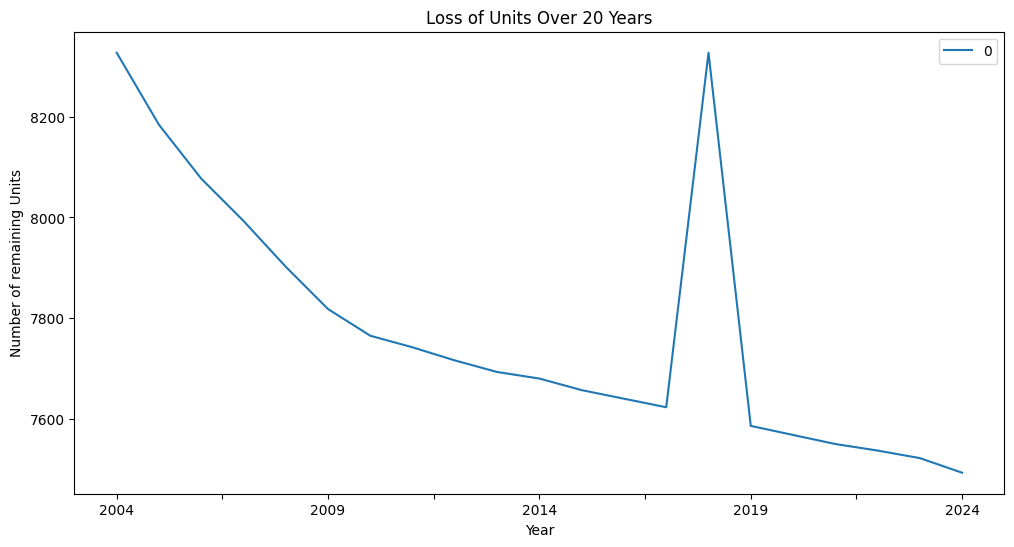

In [6]:
# for each year, count the number of rows with changed LU values

data = {
    '2004': [changed['LU_2004'].count()],
    '2005': [changed['LU_2005'].count()],
    '2006': [changed['LU_2006'].count()],
    '2007': [changed['LU_2007'].count()],
    '2008': [changed['LU_2008'].count()],
    '2009': [changed['LU_2009'].count()],
    '2010': [changed['LU_2010'].count()],
    '2011': [changed['LU_2011'].count()],
    '2012': [changed['LU_2012'].count()],
    '2013': [changed['LU_2013'].count()],
    '2014': [changed['LU_2014'].count()],
    '2015': [changed['LU_2015'].count()],
    '2016': [changed['LU_2016'].count()],
    '2017': [changed['LU_2017'].count()],
    '2018': [changed['LU_2004'].count()],
    '2019': [changed['LU_2018'].count()],
    '2020': [changed['LU_2019'].count()],
    '2021': [changed['LU_2020'].count()],
    '2022': [changed['LU_2021'].count()],
    '2023': [changed['LU_2022'].count()],
    '2024': [changed['LU_2023'].count()],
    '2024': [changed['LU_2024'].count()]
}

count = pd.DataFrame(data).transpose()
count.plot(kind='line', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of remaining Units')
plt.title("Loss of Units Over 20 Years")

count.head(21)

In [7]:
temp = pd.merge(merged, changed, how='outer', indicator=True)
unchanged = temp[temp['_merge'] == 'left_only']
unchanged = unchanged.drop(columns=['_merge'])

unchanged.head(10)

,PID,LU_2004,LU_2005,LU_2006,LU_2007,LU_2008,LU_2009,LU_2010,LU_2011,LU_2012,...,LU_2015,LU_2016,LU_2017,LU_2018,LU_2019,LU_2020,LU_2021,LU_2022,LU_2023,LU_2024
0,100001000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
1,100002000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
2,100003000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
3,100004000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
4,100005000,R2,R2,R2,R2,R2,R2,R2,R2,R2,...,R2,R2,R2,R2,R2,R2,R2,R2,R2,R2
5,100006000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
6,100007000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
7,100008000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
8,100009000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3
9,100010000,R3,R3,R3,R3,R3,R3,R3,R3,R3,...,R3,R3,R3,R3,R3,R3,R3,R3,R3,R3


In [8]:

grouped_04 = units_04.groupby('LU_2004').count().rename(columns={'PID': '2004'})
grouped_05 = units_05.groupby('LU_2005').count().rename(columns={'PID': '2005'})
grouped_06 = units_06.groupby('LU_2006').count().rename(columns={'PID': '2006'})
grouped_07 = units_07.groupby('LU_2007').count().rename(columns={'PID': '2007'})
grouped_08 = units_08.groupby('LU_2008').count().rename(columns={'PID': '2008'})
grouped_09 = units_09.groupby('LU_2009').count().rename(columns={'PID': '2009'})
grouped_10 = units_10.groupby('LU_2010').count().rename(columns={'PID': '2010'})
grouped_11 = units_11.groupby('LU_2011').count().rename(columns={'PID': '2011'})
grouped_12 = units_12.groupby('LU_2012').count().rename(columns={'PID': '2012'})
grouped_13 = units_13.groupby('LU_2013').count().rename(columns={'PID': '2013'})
grouped_14 = units_14.groupby('LU_2014').count().rename(columns={'PID': '2014'})
grouped_15 = units_15.groupby('LU_2015').count().rename(columns={'PID': '2015'})
grouped_16 = units_16.groupby('LU_2016').count().rename(columns={'PID': '2016'})
grouped_17 = units_17.groupby('LU_2017').count().rename(columns={'PID': '2017'})
grouped_18 = units_18.groupby('LU_2018').count().rename(columns={'PID': '2018'})
grouped_19 = units_19.groupby('LU_2019').count().rename(columns={'PID': '2019'})
grouped_20 = units_20.groupby('LU_2020').count().rename(columns={'PID': '2020'})
grouped_21 = units_21.groupby('LU_2021').count().rename(columns={'PID': '2021'})
grouped_22 = units_22.groupby('LU_2022').count().rename(columns={'PID': '2022'})
grouped_23 = units_23.groupby('LU_2023').count().rename(columns={'PID': '2023'})
grouped_24 = units_24[['PID','LU_2024']].groupby('LU_2024').count().rename(columns={'PID': '2024'})

grouped_merged = pd.concat([grouped_04, grouped_05, grouped_06, grouped_07, grouped_08, grouped_09, grouped_10, grouped_11, grouped_12, grouped_13, grouped_14, grouped_15, grouped_16, grouped_17, grouped_18, grouped_19, grouped_20, grouped_21, grouped_22, grouped_23, grouped_24])


grouped_merged.head(15)


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
R1,29960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R2,18208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R3,15643.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R4,2858.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CL,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CM,NaN,303.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R1,NaN,29850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


KeyError: "None of [Index(['R1'], dtype='object')] are in the [columns]"

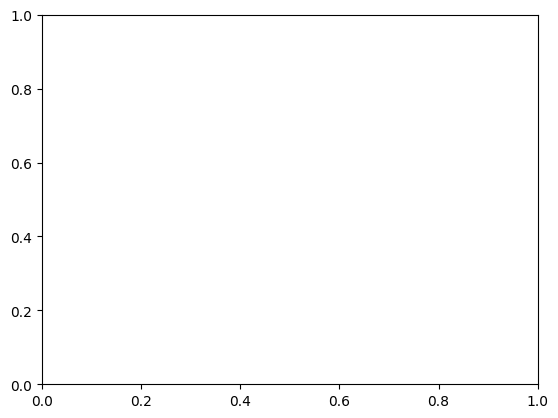

In [9]:
min_r1 = grouped_merged.transpose()['R1'].min() - 50
max_r1 = grouped_merged.transpose()['R1'].max() + 50

fig, ax = plt.subplots()
grouped_merged[['R1']].plot.line(ax = ax)
ax.set_ylim(min_r1, max_r1)
plt.show()

In [ ]:
min_r2 = grouped_merged['R2'].min() - 50
max_r2 = grouped_merged['R2'].max() + 50

fig, ax = plt.subplots()
grouped_merged[['R2']].plot.line(ax = ax)
ax.set_ylim(min_r2, max_r2)
plt.show()

In [ ]:
min_r3 = grouped_merged['R3'].min() - 50
max_r3 = grouped_merged['R3'].max() + 50

fig, ax = plt.subplots()
grouped_merged[['R3']].plot.line(ax = ax)
ax.set_ylim(min_r3, max_r3)
plt.show()

In [ ]:
min_r4 = grouped_merged['R4'].min() - 50
max_r4 = grouped_merged['R4'].max() + 50

fig, ax = plt.subplots()
grouped_merged[['R3']].plot.line(ax = ax)
ax.set_ylim(min_r4, max_r4)
plt.show()

In [ ]:
units_05 = pa_2005[pa_2005.PID.isin(units_04.PID) | (pa_2005['LU'] == 'R1') | (pa_2005['LU'] == 'R2') | (pa_2005['LU'] == 'R3') | (pa_2005['LU'] == 'R4')]
units_06 = pa_2006[pa_2006.PID.isin(units_05.PID) | (pa_2006['LU'] == 'R1') | (pa_2006['LU'] == 'R2') | (pa_2006['LU'] == 'R3') | (pa_2006['LU'] == 'R4')]
units_07 = pa_2007[pa_2007.PID.isin(units_06.PID) | (pa_2007['LU'] == 'R1') | (pa_2007['LU'] == 'R2') | (pa_2007['LU'] == 'R3') | (pa_2007['LU'] == 'R4')]
units_08 = pa_2008[pa_2008.PID.isin(units_07.PID) | (pa_2008['LU'] == 'R1') | (pa_2008['LU'] == 'R2') | (pa_2008['LU'] == 'R3') | (pa_2008['LU'] == 'R4')]
units_09 = pa_2009[pa_2009.PID.isin(units_08.PID) | (pa_2009['LU'] == 'R1') | (pa_2009['LU'] == 'R2') | (pa_2009['LU'] == 'R3') | (pa_2009['LU'] == 'R4')]
units_10 = pa_2010[pa_2010.PID.isin(units_09.PID) | (pa_2010['LU'] == 'R1') | (pa_2010['LU'] == 'R2') | (pa_2010['LU'] == 'R3') | (pa_2010['LU'] == 'R4')]
units_11 = pa_2011[pa_2011.PID.isin(units_10.PID) | (pa_2011['LU'] == 'R1') | (pa_2011['LU'] == 'R2') | (pa_2011['LU'] == 'R3') | (pa_2011['LU'] == 'R4')]
units_12 = pa_2012[pa_2012.PID.isin(units_11.PID) | (pa_2012['LU'] == 'R1') | (pa_2012['LU'] == 'R2') | (pa_2012['LU'] == 'R3') | (pa_2012['LU'] == 'R4')]
units_13 = pa_2013[pa_2013.PID.isin(units_12.PID) | (pa_2013['LU'] == 'R1') | (pa_2013['LU'] == 'R2') | (pa_2013['LU'] == 'R3') | (pa_2013['LU'] == 'R4')]
units_14 = pa_2014[pa_2014.PID.isin(units_13.PID) | (pa_2014['LU'] == 'R1') | (pa_2014['LU'] == 'R2') | (pa_2014['LU'] == 'R3') | (pa_2014['LU'] == 'R4')]
units_15 = pa_2015[pa_2015.PID.isin(units_14.PID) | (pa_2015['LU'] == 'R1') | (pa_2015['LU'] == 'R2') | (pa_2015['LU'] == 'R3') | (pa_2015['LU'] == 'R4')]
units_16 = pa_2016[pa_2016.PID.isin(units_15.PID) | (pa_2016['LU'] == 'R1') | (pa_2016['LU'] == 'R2') | (pa_2016['LU'] == 'R3') | (pa_2016['LU'] == 'R4')]
units_17 = pa_2017[pa_2017.PID.isin(units_16.PID) | (pa_2017['LU'] == 'R1') | (pa_2017['LU'] == 'R2') | (pa_2017['LU'] == 'R3') | (pa_2017['LU'] == 'R4')]
units_18 = pa_2018[pa_2018.PID.isin(units_17.PID) | (pa_2018['LU'] == 'R1') | (pa_2018['LU'] == 'R2') | (pa_2018['LU'] == 'R3') | (pa_2018['LU'] == 'R4')]
units_19 = pa_2019[pa_2019.PID.isin(units_18.PID) | (pa_2019['LU'] == 'R1') | (pa_2019['LU'] == 'R2') | (pa_2019['LU'] == 'R3') | (pa_2019['LU'] == 'R4')]
units_20 = pa_2020[pa_2020.PID.isin(units_19.PID) | (pa_2020['LU'] == 'R1') | (pa_2020['LU'] == 'R2') | (pa_2020['LU'] == 'R3') | (pa_2020['LU'] == 'R4')]
units_21 = pa_2021[pa_2021.PID.isin(units_20.PID) | (pa_2021['LU'] == 'R1') | (pa_2021['LU'] == 'R2') | (pa_2021['LU'] == 'R3') | (pa_2021['LU'] == 'R4')]
units_22 = pa_2022[pa_2022.PID.isin(units_21.PID) | (pa_2022['LU'] == 'R1') | (pa_2022['LU'] == 'R2') | (pa_2022['LU'] == 'R3') | (pa_2022['LU'] == 'R4')]
units_23 = pa_2023[pa_2023.PID.isin(units_22.PID) | (pa_2023['LU'] == 'R1') | (pa_2023['LU'] == 'R2') | (pa_2023['LU'] == 'R3') | (pa_2023['LU'] == 'R4')]
units_24 = pa_2024[pa_2024.PID.isin(units_23.PID) | (pa_2024['LU'] == 'R1') | (pa_2024['LU'] == 'R2') | (pa_2024['LU'] == 'R3') | (pa_2024['LU'] == 'R4')]

In [ ]:
import pandas as pd

# Sample dataframe
data = {
    'item': ['A', 'B', 'C', 'D', 'E'],
    '2019': ['type1', 'type2', 'type1', 'type3', 'type2'],
    '2020': ['type2', 'type2', 'type1', 'type3', 'type1'],
    '2021': ['type3', 'type1', 'type2', 'type3', 'type1']
}

df = pd.DataFrame(data)

# Step 1: Reshape the Dataframe
df_long = df.melt(id_vars=['item'], var_name='year', value_name='type')

# Step 2: Group by Year and Type
grouped = df_long.groupby(['year', 'type'])

# Step 3: Count the Occurrences
count_df = grouped.size().reset_index(name='count')

# Step 4: Reshape Again (Optional)
pivot_table = count_df.pivot(index='type', columns='year', values='count')

print(pivot_table)

df.head()